# **Data Analyzing File**

### **Making imports**

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from Functions.air_distance import haversine
from Functions.data_analyze import DataAnalyse
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.ensemble import StackingRegressor


from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score



### **Reading Data file**

In [2]:
YEREVAN_CENTER_LAT, YEREVAN_CENTER_LONG = 40.18111, 44.51361
obj_class = DataAnalyse(YEREVAN_CENTER_LAT, YEREVAN_CENTER_LONG)

### **Columns**

In [3]:
obj_class.df.columns

Index(['link', 'category', 'category_from_list', 'title', 'address', 'price',
       'agency', 'longtitude', 'latitude', 'area', 'landarea', 'purpose',
       'buildingtype', 'elevator', 'floorcount', 'roomcount', 'bathroomcount',
       'newbuilded', 'furniture', 'garagecount', 'repairstatus', 'balcony',
       'guests', 'domophone', 'doorman', 'playground', 'coveredparking',
       'outdoorparking', 'garage_tr_fl', 'househas', 'children', 'animal',
       'utilitypayment', 'prepayment', 'description', 'distance_from_center'],
      dtype='object')

## **Apartment Sale ML Model**

In [4]:
filt = obj_class.df['category_from_list'] == 'apartments-sale'

### **Finding outlaiers and filtering data**

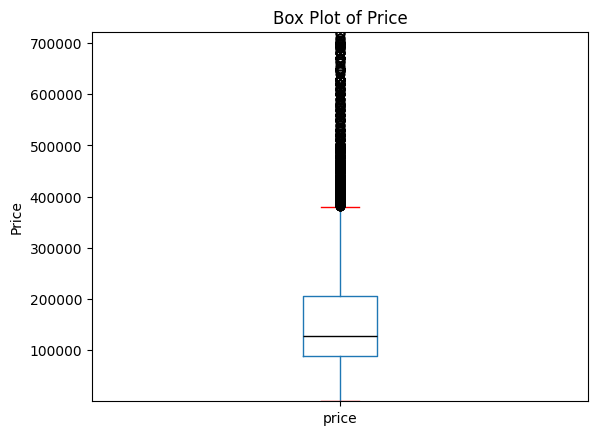

In [6]:
outlaiers = obj_class.find_outliers(filt=filt, plot=True)
filtered_data = obj_class.remove_outliers(filt=filt)

In [7]:
filtered_data.head(20)

,link,category,category_from_list,title,address,price,agency,longtitude,latitude,area,...,coveredparking,outdoorparking,garage_tr_fl,househas,children,animal,utilitypayment,prepayment,description,distance_from_center
17110,https://www.list.am/item/18377825,sale,apartments-sale,"2 սենյականոց բնակարան Լենինգրադյան փողոցում, 5...","Լենինգրադյան փողոց, Երևան",81000.0,True,44.463159,40.192032,55.0,...,False,False,False,[],NaN,NaN,NaN,NaN,Կոդ 2-414Վաճառվում է 2 սենյականոց բնակարան Լեն...,4.454420
17111,https://www.list.am/item/20602344,sale,apartments-sale,"3 սենյականոց բնակարան Կոմիտասի պողոտայում, 71 ...","Կոմիտասի պողոտա, Երևան",155000.0,True,44.493054,40.199581,71.0,...,False,False,False,[],NaN,NaN,NaN,NaN,Վաճառվում է 71 քմ մակերեսով 3 սենյականոց բնակա...,2.695776
17112,https://www.list.am/item/19535345,sale,apartments-sale,3 սենյականոց բնակարան նորակառույց շենքում Կարա...,"Կարապետ Ուլնեցու փողոց, Երևան",138000.0,True,44.533017,40.198842,74.0,...,False,True,False,[],NaN,NaN,NaN,NaN,2-3 սենյականոց բնակարան նորակառույց շենքում։Բն...,2.570046
17113,https://www.list.am/item/20346818,sale,apartments-sale,"3 սենյականոց բնակարան Դավիթաշենում, 80 ք.մ., ն...",Երևան › Դավիթաշեն,170000.0,True,44.488189,40.220299,80.0,...,False,True,False,[],NaN,NaN,NaN,NaN,RICH HOUSE Reality-ն առաջարկում է շքեղ բնակարա...,4.863134
17114,https://www.list.am/item/19405693,sale,apartments-sale,2 սենյականոց բնակարան նորակառույց շենքում Սայա...,"Սայաթ-Նովայի պողոտա, Երևան",265000.0,True,44.522323,40.181413,62.0,...,False,True,False,"['conditioner', 'refrigerator', 'stove', 'dish...",NaN,NaN,NaN,NaN,Վաճառվում է 2 սենյականոց ստուդիո ոճի բնակարան ...,0.740968
17115,https://www.list.am/item/19655717,sale,apartments-sale,"1 սենյականոց բնակարան, Գարեգին Նժդեհի հրապարակ...","Գարեգին Նժդեհի հրապարակ, Երևան",110000.0,True,44.482314,40.150445,46.0,...,False,False,False,[],NaN,NaN,NaN,NaN,Վաճառվում է 1-2 սեն.բն. Հրապարակի մոտ ստալինյա...,4.324194
17116,https://www.list.am/item/20110110,sale,apartments-sale,"2 սենյականոց բնակարան նորակառույց շենքում, Mon...","Monte Melkonyan Avenue 52/1, Yerevan",109000.0,False,44.476874,40.186834,60.0,...,False,False,False,[],NaN,NaN,NaN,NaN,Վաճառվում է բնակարան Վերածնունդ նորաստեղծ բնակ...,3.184979
17117,https://www.list.am/item/20563961,sale,apartments-sale,"4 սենյականոց բնակարան Խորենացու փողոցում, 142 ...","Խորենացու փողոց, Երևան",368000.0,True,44.506892,40.178607,142.0,...,False,True,False,"['conditioner', 'refrigerator', 'stove', 'dish...",NaN,NaN,NaN,NaN,Վաճառվում է 4 սենյականոց կապիտալ վերանորոգված ...,0.634977
17118,https://www.list.am/item/20281968,sale,apartments-sale,3 սենյականոց բնակարան նորակառույց շենքում կենտ...,Երևան › Կենտրոն,215000.0,True,44.509537,40.179246,94.0,...,False,False,False,"['conditioner', 'refrigerator', 'stove', 'dish...",NaN,NaN,NaN,NaN,Վաճառվում է 3 սենյականոց բնակարան Ոսկու շուկայ...,0.403350
17119,https://www.list.am/item/19543385,sale,apartments-sale,3 սենյականոց բնակարան նորակառույց շենքում Սևքա...,"Սևքարեցի Սաքոյի փողոց, Երևան",245000.0,True,44.492996,40.207409,132.0,...,True,False,False,[],NaN,NaN,NaN,NaN,Վաճառվում 3 սենյականոց բնակարան Սևքարեցի Սաքոյ...,3.408412


In [8]:
categories_effecting_price = ['agency', 'area', 'buildingtype', 'elevator', 'floorcount', 'roomcount', 'bathroomcount',
                              'repairstatus', 'balcony', 'distance_from_center', 'coveredparking']

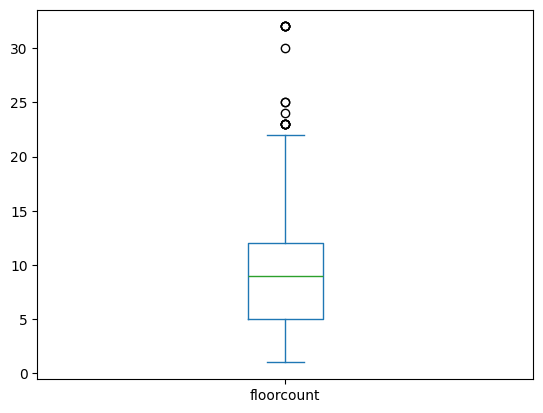

In [9]:
filtered_data['floorcount'].plot.box()
filtered_data = filtered_data[filtered_data['floorcount'] <= 23]

## **Model Building**

In [10]:
filtered_data[categories_effecting_price].head(10)

,agency,area,buildingtype,elevator,floorcount,roomcount,bathroomcount,repairstatus,balcony,distance_from_center,coveredparking
17110,True,55.0,stone,False,5,2,1,capital-reconstructed,notavailable,4.454420,False
17111,True,71.0,stone,False,5,3,2,capital-reconstructed,close,2.695776,False
17112,True,74.0,monolith,True,16,3,1,unrepaired,open,2.570046,False
17113,True,80.0,panel,True,14,3,1,designer-style,notavailable,4.863134,False
17114,True,62.0,monolith,True,22,2,1,euro,notavailable,0.740968,False
17115,True,46.0,stone,False,4,1,1,capital-reconstructed,open,4.324194,False
17116,False,60.0,monolith,True,17,2,1,capital-reconstructed,open,3.184979,False
17117,True,142.0,stone,False,6,4,2,capital-reconstructed,open,0.634977,False
17118,True,94.0,monolith,True,7,3,1,capital-reconstructed,notavailable,0.403350,False
17119,True,132.0,monolith,True,6,3,2,capital-reconstructed,open,3.408412,True


In [11]:
le=LabelEncoder()
for i in categories_effecting_price:
    if filtered_data[i].dtype == 'object':
        filtered_data[i] = le.fit_transform(filtered_data[i])
    elif filtered_data[i].dtype == 'bool':
        filtered_data[i] = le.fit_transform(filtered_data[i])
filtered_data[categories_effecting_price]

,agency,area,buildingtype,elevator,floorcount,roomcount,bathroomcount,repairstatus,balcony,distance_from_center,coveredparking
17110,1,55.0,3,0,5,2,1,0,1,4.454420,0
17111,1,71.0,3,0,5,3,2,0,0,2.695776,0
17112,1,74.0,1,1,16,3,1,6,2,2.570046,0
17113,1,80.0,2,1,14,3,1,2,1,4.863134,0
17114,1,62.0,1,1,22,2,1,3,1,0.740968,0
...,...,...,...,...,...,...,...,...,...,...,...
100979,1,50.0,3,0,3,3,1,5,1,157.131513,0
100981,0,78.0,2,1,12,3,2,0,1,4.799710,0
100982,1,45.0,3,0,5,2,1,3,1,2.778431,0
100984,1,44.0,2,1,9,2,1,1,1,0.805729,0


### **Linear Regration**

#### **Data seporation as X and Y**

In [12]:
Y = np.log1p(filtered_data['price'])
X = filtered_data[categories_effecting_price]

#### **Data splitting**

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=100)

In [14]:
LR_model = LinearRegression()
LR_model.fit(X_train,Y_train)

LinearRegression()

### **Decision Tree**

In [15]:
DT_model = DecisionTreeRegressor()
DT_model.fit(X_train,Y_train)

DecisionTreeRegressor()

### **Random Forest**

In [16]:
RF_model = RandomForestRegressor(n_estimators=500, random_state=42)
RF_model.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=500, random_state=42)

### **AdaBoost Regression**

In [17]:
ADB_model = AdaBoostRegressor(n_estimators=500, random_state=42)
ADB_model.fit(X_train,Y_train)

AdaBoostRegressor(n_estimators=500, random_state=42)

### **KNeighbors Regressor**

In [18]:
KNN_model = KNeighborsRegressor(n_neighbors=5)
KNN_model.fit(X_train,Y_train)

KNeighborsRegressor()

### **XGB Regression**

In [19]:
XGB_model = XGBRegressor()
XGB_model.fit(X_train,Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### **Voting Regressor**

In [20]:
ensemble_models = [
    ('LinearRegression',LinearRegression()),
    ('AdaBoostRegressor', AdaBoostRegressor()),
    ('RandomForest', RandomForestRegressor()),
    ('KNNRegressor', KNeighborsRegressor(n_neighbors=5)),
    ('XGBRegression', XGBRegressor())
]
VT_model = VotingRegressor(estimators=ensemble_models,n_jobs=2)
VT_model.fit(X_train,Y_train)

VotingRegressor(estimators=[('LinearRegression', LinearRegression()),
                            ('AdaBoostRegressor', AdaBoostRegressor()),
                            ('RandomForest', RandomForestRegressor()),
                            ('KNNRegressor', KNeighborsRegressor()),
                            ('XGBRegression',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_s...
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...))],
                n_jobs=2)

###  **Stack Regressor**

In [21]:
base_models = [
    ('LinearRegression',LinearRegression()),
    ('AdaBoostRegressor', AdaBoostRegressor()),
    ('KNNRegressor', KNeighborsRegressor(n_neighbors=5)),
    ('XGBRegression', XGBRegressor())
]
STACK_model = StackingRegressor(
    estimators=base_models,
    final_estimator=RandomForestRegressor()
)
STACK_model.fit(X_train,Y_train)

StackingRegressor(estimators=[('LinearRegression', LinearRegression()),
                              ('AdaBoostRegressor', AdaBoostRegressor()),
                              ('KNNRegressor', KNeighborsRegressor()),
                              ('XGBRegression',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=...
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))],
                  final_estimator=RandomForestRegressor())

## **Error values**

In [32]:
mse_values = [
    mean_squared_error(Y_test, y_pred_LR),
    mean_squared_error(Y_test, y_pred_DT),
    mean_squared_error(Y_test, y_pred_RF),
    mean_squared_error(Y_test, y_pred_ADB),
    mean_squared_error(Y_test, y_pred_KNN),
    mean_squared_error(Y_test, y_pred_XGB),
    mean_squared_error(Y_test, y_pred_VT),
    mean_squared_error(Y_test, y_pred_STACK),
]

mae_values = [
    mean_absolute_error(Y_test, y_pred_LR),
    mean_absolute_error(Y_test, y_pred_DT),
    mean_absolute_error(Y_test, y_pred_RF),
    mean_absolute_error(Y_test, y_pred_ADB),
    mean_absolute_error(Y_test, y_pred_KNN),
    mean_absolute_error(Y_test, y_pred_XGB),
    mean_absolute_error(Y_test, y_pred_VT),
    mean_absolute_error(Y_test, y_pred_STACK),
]

r2_values = [
    r2_score(Y_test, y_pred_LR),
    r2_score(Y_test, y_pred_DT),
    r2_score(Y_test, y_pred_RF),
    r2_score(Y_test, y_pred_ADB),
    r2_score(Y_test, y_pred_KNN),
    r2_score(Y_test, y_pred_XGB),
    r2_score(Y_test, y_pred_VT),
    r2_score(Y_test, y_pred_STACK),
]

model_names = [
    'Linear Regression', 'Decision Tree', 'Random Forest', 'AdaBoost', 'KNN', 'XGB', 'VotingRegressor', 'StackingRegressor'
]

for name, mse, mae, r2 in zip(model_names, mse_values, mae_values, r2_values):
    print(f"Model {name}")
    print(f"    MSE: {mse:.2f}")
    print(f"    MAE: {mae:.2f}")
    print(f"    R2: {r2:.2f}")
    print("----------")

best_mse = min(mse_values)
best_mae = min(mae_values)
best_r2 = max(r2_values)

best_mse_model = model_names[mse_values.index(best_mse)]
best_mae_model = model_names[mae_values.index(best_mae)]
best_r2_model = model_names[r2_values.index(best_r2)]

print(f'Best model based on MSE {best_mse_model} : {best_mse:.2f}')
print(f'Best model based on MAE {best_mae_model} : {best_mae:.2f}')
print(f'Best model based on R2 {best_r2_model} : {best_r2:.2f}')


Model Linear Regression
    MSE: 0.22
    MAE: 0.33
    R2: 0.33
----------
Model Decision Tree
    MSE: 0.17
    MAE: 0.20
    R2: 0.47
----------
Model Random Forest
    MSE: 0.10
    MAE: 0.15
    R2: 0.69
----------
Model AdaBoost
    MSE: 1.35
    MAE: 0.99
    R2: -3.14
----------
Model KNN
    MSE: 0.11
    MAE: 0.17
    R2: 0.67
----------
Model XGB
    MSE: 0.11
    MAE: 0.16
    R2: 0.68
----------
Model VotingRegressor
    MSE: 0.15
    MAE: 0.26
    R2: 0.53
----------
Model StackingRegressor
    MSE: 0.10
    MAE: 0.16
    R2: 0.70
----------
Best model based on MSE StackingRegressor : 0.10
Best model based on MAE Random Forest : 0.15
Best model based on R2 StackingRegressor : 0.70


In [29]:
new_data = pd.DataFrame({
    'agency': [0],
    'area': [87],
    'buildingtype': [2],
    'elevator': [1],
    'floorcount': [9],
    'roomcount': [3],
    'bathroomcount': [1],
    'repairstatus': [0],
    'balcony': [0],
    'distance_from_center': [2.0222633],
    'coveredparking': [0]
})

In [30]:
np.expm1(RF_model.predict(new_data))

array([143293.99350945])

## **Save Model**

In [31]:
# from joblib import dump
# dump(RF_model, 'random_forest_model_apartment_sale.joblib')

['random_forest_model_apartment_sale.joblib']